# Modèle de cordes vocales

In [1]:
# Importation des librairies réunies en une seule cellule, plus pratique
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.io.wavfile import write, read
import wave
import struct
import IPython.display as ipd

# Introduction

La synthèse vocale est un procédé qui permet à quelque chose d’autre qu’un être humain d’émettre des sons interprétables comme un langage parlé. La première machine compréhensible, The Voder, remonte à 1939, il était possible de la faire parler anglais en la manipulant à la manière d’un piano. Mais l’idée d’instrument capable de parler à la manière d’un homme ne date pas d’hier. En 1761, Léonard Euler s'imaginait déjà qu’à l’avenir des machines remplaçant la parole pourrait voir le jour. Aujourd’hui, la synthèse vocale s'est énormément démocratisée et elle est présente dans la plupart des appareils électriques du téléphone portable à l’aspirateur autonome. Néanmoins, bien qu’elle permette à une machine dotée de parole, les techniques utilisées pour synthétiser ces voix artificielles n’ont en général rien à voir avec ce qui permet à nous, humains, de dialoguer. 

C’est pourquoi nous chercherons à établir un modèle physique des cordes vocales. Ce modèle pourra nous permettre de mieux comprendre de quelles paramètres dépendent les fréquences et l'intensité des sons que nous sommes capables de produire et s’il est possible à partir de ce modèle de recréer un chant ou un cri émis par un humain.

L'intérêt principal de ce sujet est qu’il existe de nombreuses manières de synthétiser un son mais qu’il est assez rare que ces méthodes tentent de recréer ces sons à partir des mécanismes physiques qui les produisent. C’est donc en nous basant sur le travail d’autres chercheurs que nous essayerons de mettre au point un tel modèle.

## Qu'est-ce qu'un son ?

<img src="son.gif" alt="schema" width="400"/>

Le son est une vibration mécanique d'un fluide, qui se propage sous forme d'ondes longitudinales grâce à la déformation élastique de ce fluide.
Dans un milieu fluide compressible, une variation de pression se propage sous la forme d'une onde. Le son ne se propage pas dans le vide : il faut de la matière pour que sa vibration puisse se propager en ondes sonores. L'air, dans lequel vivent les humains, est un milieu propice, et les variations de la pression de l’air constituent le son. L'amplitude de la variation de pression est faible par rapport à la pression statique (pression atmosphérique) ; pour qu'elle soit perceptible, il faut qu'elle soit suffisamment rapide et répétée.

On appelle source sonore un objet vibrant, comme un instrument de musique ou un haut-parleur, à l'origine d'une vibration de l'air. La perturbation se propage, mais les particules d'air oscillent seulement de quelques micromètres autour d'une position stable, de la même façon que lorsqu'on jette une pierre dans l'eau, les vagues se déplacent en s'éloignant du point de chute, mais l'eau reste au même endroit, elle ne fait que se déplacer verticalement et non suivre les vagues (un bouchon placé sur l'eau reste à la même position sans se déplacer). Dans les fluides, l'onde sonore est longitudinale, c'est-à-dire que les particules vibrent parallèlement à la direction de déplacement de l'onde.

Les solides, en vibrant, peuvent transmettre un son. La vibration s'y propage, comme dans les fluides, avec une faible oscillation des atomes autour de leur position d'équilibre, résultant en une contrainte du matériau, équivalent à la pression dans un fluide, mais plus difficile à mesurer. La rigidité du matériau permet la transmission d'ondes de contraintes transversales. De même, quoique dans une moindre mesure, la viscosité d'un fluide peut modifier, particulièrement dans des conditions extrêmes, les équations de propagation calculées pour un gaz parfait. 

## Fonctionnement des cordes vocales 

<img src="cordes.png" alt="schema" width="400"/>

Les cordes vocales, situés au niveau du larynx, derrière la pomme d'Adam, sont un des organes musculaire de la phonation, c'est à dire qui permet l'émission de son comme un cri ou un chant. 

Les cordes vocales sont tendues, dans le larynx, de l'angle rentrant du cartilage thyroïde (celui qui, ayant un angle de 90° chez l'homme donne le relief de la pomme d'Adam) à l'apophyse vocale des cartilages aryténoïdes.

Elles sont composées de plusieurs couches de structures différentes :

- le muscle vocal
- puis la lamina propria qui regroupe trois couches : profonde, moyenne et superficielle.

Les couches profondes et moyennes sont formées par le ligament vocal. La couche superficielle est un espace de glissement appelé espace de Reinke. Ces différentes épaisseurs sont recouvertes de muqueuse plus ou moins visqueuse.

De couleur blanc nacré, les cordes vocales sont des muscles de 23 mm en moyenne de longueur chez l'homme et de 19 mm en moyenne chez la femme, de 2 à 4 mm d'épaisseur, recouverts de muqueuses, qui se contractent en fonction de la respiration, de la déglutition, de la toux, du rire3.

Elles sont écartées lorsque le sujet respire, rapprochées quand il déglutit. 

### Phonation

![vocal fold animated](Vocal_fold_animated.gif)

Les deux tissus se rapproche l'un de l'autre lorsqu'il sont contractés, faisant varier la pression de l'air qui passe entre les deux cordes. Cette variation de pression va venir créer ces effets de condensation et de rarefaction qui est à l'origine du son que l'on entend. En temps normale ce sont les muscles vocaux qui contracte les cordes et détermine l'écart entre les deux et nous permette de créer des sons à différentes fréquences. Nous verrons que cette contraction est traitée différemment dans nos modèles.

### Problématique
Avec ce modèle nous essayerons de reproduire des fréquences sonores du même ordre de grandeur que des cordes vocales humaine. De manière plus approfondi nous essayerons de déterminer l'importance des différents paramètres qui régissent notre modèle et d'en déduire des corrélation expérimentale.

## Premier modèle : des cordes vocales à partir d'un système multi-masse.

La première méthode populaire pour modéliser des cordes vocales à partir de phénomènes physique a été celle de J. L Flanagan dans un article intitulé <em>source system interaction in the vocal tract</em> paru en 1968.
C'est à partir de cette idée que nous allons réaliser notre première modélisation de corde vocale. Nous n'en garderons en réalité que l'idée car les calculs présentés dans l'article dépasse pour l'instant nos compétence. De plus, le but est de produire un premier résultat rapidement pour bien cerner les limites et difficultées du projet.

Les équations de ce modèle seront résolues analytiquement et le son produit sera conçu numériquement à partir du résultat des équations.

#### Hypothèses

- En ce qui concerne la synthèse du son produite grâce au modèle, on se limitera à la fréquence émise à partir des cordes vocales uniquement. Le canal vocal, de l'épiglotte jusqu'au lèvres et au narines, ne sera pas modéliser. Il nous sera donc impossible de reproduire des phonèmes ou des mots. 

- On étudiera le mouvement des cordes vocales dans le plan horizontal et on négligera les oscillation verticale, ainsi que la dissipation de ces oscillations dans les tissus de la glotte.

- Le système $\left \{ masse + ressort\right \}$ est isolé.

- On négligera les frottements visqueux du à l'humidité de l'air et des tissus des cordes vocales.

- On considère les tissus vocaux (les masses de notre système) comme indéformable.

Voici une description rapide du système de masses oscillantes que nous allons utiliser : 

#### Hypothèses 

![masse-ressort](unnamed.gif)

Une masse, à qui on donne le rôle d'une corde vocale, et reliée par deux ressort ou deux élastique à deux parois. la masse ne possède qu'un seul degré de liberté (verticale sur l'image).

En quoi ce modèle est-il pertinent ? Reprenons l'animation des cordes vocales lors de la phonation :

<img src="vfold.png" alt="schema" width="400"/>

Si l'on suppose que les deux parois sont en fait la face supèrieur (côté épiglotte) et inférieur (côté trachée) alors on pourrait modéliser le mouvement d'"oscillation" des cordes vocales lors de la phonation grâce à ce système. Les deux masses en oscillation vont venir périodiquement modifier la pression glottale et créer les effets de compression et de raréfaction de l'air .

Établissons la dynamque de notre modèle afin de simplifier un peu les choses, on ne va modéliser qu'un seul des deux ressort, en supposant que l'autre agit symétriquement:

En appliquant le principe fondamental de la dynamique, en supposant que le poids des cordes vocales se compensent à cause de leur intéraction avec les autres tissus:

$$m\ddot{x} = 2Tsin(\theta)$$

où $\theta$ est l'angle formé entre le ressort et l'axe verticale de repos de la masse, avec la loi de Hook, on obtient :

$$m\ddot{x} = \frac{2k(l-l_0)x}{l}$$

On en déduit $\omega$ la pulsation propre du ressort :

$$\omega^2 = -\frac{\ddot{x}}{x} = \frac{2k(l-l_0)}{ml}$$

$$f^2 = \frac{1}{4\pi^2}\frac{2k(l-l_0)}{ml}$$

$$f = \frac{1}{\pi}\sqrt{\frac{k(l-l_0)}{2ml}}$$

$$f = \frac{1}{\pi}\sqrt{\frac{T}{ml}}$$

En rappelant que $\omega = \sqrt{\frac{k}{l}}$ on en déduit la fréquence propre du ressort :

$$f = \frac{1}{\pi}\sqrt{\frac{k}{ml}} $$

### Remarque

>En comparant la loi de Hooke et la formule qui déterminer le module de Young $E$, on peut trouver une relation de proportionnalité inverse entre $k$ la constante de raideur des ressort et $l$ leur longueur.

$$F= \frac{AE}{l}\Delta l \;\;\; F=-k\Delta{l} \; \implies k \propto \frac{1}{l}$$

On a obtenu la fréquence à laquelle vibre nos cordes vocales.

Déjà une limite de notre modèle apparait : avec des cordes vocales de masse $m$ données on ne pourra atteindre qu'une seule fréquence... pas très pratiques pour chanter (par contre pour crier ça va).

Pour améliorer cela, on peut complexifier un petit peu la surface latérale de nos cordes vocales : au lieu d'avoir une seule masse oscillante sur la paroi on peut en ajouter plusieurs côte à côte. Comme on peut le voir sur ce schéma.

<img src="vfold2.png" alt="schema" width="200"/>

Le schéma n'est pas très claire et encore moins à l'échelle : les ressorts ne relient pas les masses entre elles. Elles oscillent indépendemment les unes des autres et toujours. Les ressorts sont attachés à la paroi latérale de la corde vocale au niveau des points noirs.

Pour simplifier les choses on utilisera des masses et des longueurs proportionnels à la masse de départ, on se rendra compte que cela permet de construire les harmoniques de la fréquence fondamentale obtenue grâce à la première masse. On peut calculer cette fréquence pour $f_n$ où $f_1$ est la fréquence fondamentale.

$$f_n = \frac{1}{\pi}\sqrt{\frac{T}{(m/n)(l/n)}} $$

$$f_n = \frac{n}{\pi}\sqrt{\frac{T}{ml}} $$

Pour comprendre comment ce model fonctionne, il faut s'imaginer une ribenbelle de petites masses oscillantes tel que pour la n-ième masse d'une série de masses oscillantes, sa taille et la longueur de son élastique est $1/n$ celle de la première. Bien sûr, il peut y avoir plusieurs séries de masse différentes partant d'un fréquence $f_1$ différente.

### Synthèse sonore

Pour synthétiser un son à partir de ces équations, nous allons étudier le spectre des fréquences du son 'a' du mot 'asticot' pré-enregistrer à l'aide de transformées de Fourier et trouver des valeurs de $m$, $T$, et $l$ qui nous permette de reproduire ces fréquences avec notre modèle.

Ci-dessous le son enregistré :

In [2]:
# Audio player 
ipd.Audio('reference.wav')

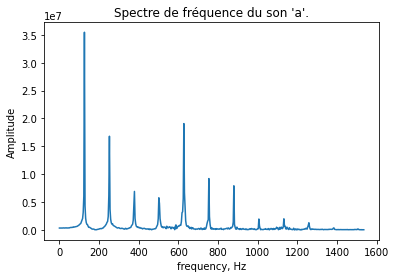

In [3]:
def fft_wav(filename):
    
    """
    Renvoie le spectre des fréquences d'un fichier wav.
    Attention d'ajouter .wav après le nom du fichier.
    """
    
    sampRate, reference_data = read(filename) # read wav from scypi.io.wavfile librairie

    fft_spectrum = np.fft.rfft(reference_data) # Transformée de fourier appliqué à notre signal
    freq = np.fft.rfftfreq(reference_data.size, d=1./sampRate) # Échelle des fréquences

    fft_spectrum_abs = np.abs(fft_spectrum) 
    
    return freq, fft_spectrum_abs

freq, fft_spectrum = fft_wav('reference.wav')

plt.plot(freq[:500], fft_spectrum[:500]) # Affiche seulment les fréquence les plus importantes
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude")
plt.title("Spectre de fréquence du son 'a'.")
plt.show()

On peut utiliser ce petit script pour obtenir la valeur des fréquences qui nous interresse. ( [Y] pour le repasser en mode code) 

On remarque que la fondamentale ce situe environ à 125 Hz et qu'elle possède environ six harmoniques. 
Les valeurs de fréquences expérimentales donneront donc :

$$f_0 = 125Hz$$

$$f_n = nf_0$$

Avec notre modèle le rapport entre la fréquence foncamentale et les harmoniques ce caractérisera par : 

$$f_i = \frac{i}{\pi}\sqrt{\frac{T}{ml}} \,, \, \, i \in \{1, 2, 3, 4, 5, 6\}$$

Pour créer le signal sonore final on sommera les sinusoïdales des fréquences obtenues et on ajustera (arbitrairement) leur amplitude.

## Résolution numérique des équations

In [4]:
#Default values are m = 0.15 * 10**(-3) kg, l = 1.4 * 10**(-3) m, T = 3 N
m = 0.15 * 10**(-3) #kg 
l = 1.4 * 10**(-3) #m
T =  1#N

In [5]:
# Default values are m = 0.15 * 10**(-3) kg, l = 1.4 * 10**(-3) m, T = 3 N
m = 0.3 * 10**(-3) #kg 
l = 1.395 * 10**(-3) #m
T =  0.8 #N

def frequency_from_fundamental(n, round_at=0, logs=False):
    
    """Calculate frequency based on a {mass + ruberband} system."""

    frequency = 1/np.pi * np.sqrt(n**2*T/(m*l))
    
    if round_at:
        frequency = round(frequency, round_at)
        
    if logs:
        print("fundamental frequency : ", 1/np.pi * np.sqrt(T/(m*l)), "Hz")
        print("frequency", n,  "is", frequency, "Hz")
        
    return frequency

def add_sine_waves(listOfSineWave, logs=False):
    
    sumOfSineWaves = np.copy(listOfSineWave[0])

    if logs: 
        print("sumOfSineWaves", sumOfSineWaves)
        print(listOfSineWave.ndim)

    for i in range(1, len(listOfSineWave)):
       sumOfSineWaves += listOfSineWave[i]
       #print("sum at", i, ",", sumOfSineWaves)

    if logs:
        print("sumOfSineWaves :", sumOfSineWaves)

    return sumOfSineWaves

def createWaveFile(name, listOfSineWave, samplingRate = 44100, logs=False):

    F = wave.open(str(name) + '.wav', 'wb')
    F.setnchannels(1)
    F.setsampwidth(2)
    F.setframerate(samplingRate)

    if logs:
        print("dimension of listOfSines array :", listOfSineWave.ndim)

    if listOfSineWave.ndim == 1:
        for w in listOfSineWave:
            F.writeframes(struct.pack('f', w))
    else:
        for sine in listOfSineWave:
            print(sine.shape)
            for w in sine:
                #print(type(int(w)))    
                F.writeframes(struct.pack('f', w))
    F.close()
    print(str(name) + ".wav successfully created!")

    return str(name) + ".wav"

def visualize_wav(f):

    """Decompose wav file into int16 array. Return a time linspace to plot and the array"""

    framerate, frames = read(f)

    return framerate, frames

fundamental frequency :  440.09596790364077 Hz
frequency 1 is 440.09596790364077 Hz
fundamental frequency :  440.09596790364077 Hz
frequency 2 is 880.1919358072815 Hz
fundamental frequency :  440.09596790364077 Hz
frequency 3 is 1320.2879037109221 Hz
fundamental frequency :  440.09596790364077 Hz
frequency 4 is 1760.383871614563 Hz


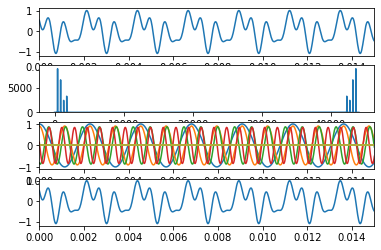

In [6]:
samplingRate = 44100
samplingInterval = 1/samplingRate

nLowHarmonics = 9
nHighHarmonics = 0
amplitudelow = 0.1
amplitudehigh = 70000

t = np.arange(0, 1, samplingInterval)
lowFrequencySineWaves = np.zeros((nLowHarmonics, t.size))
highFrequencySineWaves = np.zeros((nHighHarmonics, t.size))

frequencies = []

#Creating the lower harmonics from the lower fundamental
"""
for i in range(nLowHarmonics):
    #create sine wave from lower frequencies
    frequencies.append(frequency_from_fundamental(i+1, round_at=0))
    lowFrequencySineWaves[i] = np.exp(-amplitudelow *i) * np.cos(2*np.pi * frequency_from_fundamental(i+1, round_at=0, logs=True) * t + (-1)**i*2*np.pi*i/9)
    #plt.plot(t, sine_waves[i])
#print("lowFrequencySineWaves", lowFrequencySineWaves)
"""

def f(i):
    if i == 0:
        return 0
    if i == 1:
        return 0
    if i == 2:
        return 4
    if i == 3:
        return 2


for i in range(4):
    #create sine wave from lower frequencies
    frequencies.append(frequency_from_fundamental(i+1, round_at=0))
    lowFrequencySineWaves[i] = np.exp(-amplitudelow *i**(1/2)) * np.cos(2*np.pi * frequency_from_fundamental(i+1, round_at=0, logs=True) * t + f(i)*2*np.pi/9)


#Creating the higher harmonics from the higher fundamental
for i in range(nHighHarmonics):
    #create sine wave from lower frequencies
    highFrequencySineWaves[i] = amplitudehigh * np.sin(2*np.pi*frequency_from_fundamental(i+1, round_at=0) * t)
    #plt.plot(t, sine_waves[i])
#print("highFrequencySineWaves", highFrequencySineWaves)

#Arbitrarly modifying our data so it sounds a little bit less terrible (and so it fits the data)
#np.delete(lowFrequencySineWaves, 1)
#np.delete(lowFrequencySineWaves, 2)
#np.delete(lowFrequencySineWaves, 3)

#Group every sine waves into one 2D-array
sineWaves = np.concatenate((lowFrequencySineWaves, highFrequencySineWaves))
#print("waves:", sine_waves)

#Add sine wave together using add method
createdSineWave = add_sine_waves(sineWaves)
createdSineWave *= 1/max(createdSineWave)
wavFile = write("test.wav", samplingRate, createdSineWave.astype('float32'))
#print("createdSineWave", createdSineWave)

#Calculate the spectrum of createdSineWave using fft
spectrum_fft = np.fft.fft(createdSineWave)

#Compute the ouput from sine wave original array
waveFromIfft = np.fft.ifft2(sineWaves)
#print(waveFromIfft)

xmax = 0.015

fig, axs = plt.subplots(4)
axs[0].plot(t, createdSineWave)
axs[0].set_xlim([0, xmax])

axs[1].plot(np.real(spectrum_fft))
axs[1].set_ylim(0)

for wave in sineWaves:
    axs[2].plot(t, wave)
axs[2].set_xlim([0, xmax])

#Visualize wav file 
framerate, frames = visualize_wav("test.wav")
t_wav = np.arange(0, len(frames))/framerate
axs[3].plot(t_wav, frames)
axs[3].set_xlim([0, xmax])
plt.show()

In [7]:
# Son synthétiser
ipd.Audio('test.wav')

In [8]:
# Son pré-enregistrer
ipd.Audio('reference.wav')

On entend bien que les fréquences des deux sons sont proches. Ce qui est aussi remarquable, c'est leurs différences : on arrive très bien à discerner lequel des deux est enregistré et lequel est synthétisé. C'est un résultat assez attendu puisque nous avons totalement négligé le canal vocal, qui sert de boîte de résonance (comme la caisse d'une guitar) au son à partir par des cordes vocales.

### Conclusion de ce premier modèle

Ce modèle comporte un problème majeur : trop de facteurs important sont oubliés dans le comportement des cordes vocales. De fait, on se limite à seulement trois paramètres, les masses "par morceaux" des cordes vocales, la longueurs des ressorts qui maintiennent ces masses et leur tension. Ces paramètres n'étant pas assez pertinent, il serait difficile de faire quelque prédiction que ce soit à partir de ce modèle.

## Second modèle : un système masse-ressort amorti et excité

L'un des soucis majeur de notre premier modèle est qu'il ne représente pas très bien le fontionnement des cordes vocales. En effet ces dernières ne sont pas vraiment constituées de multitudes de petites masses oscillantes organisées en une longue rangée, mais plutôt de deux masses assez molle qui intéragissent entre elles. Ce second modèle s'appuiera donc d'avantage sur les caractéristiques physiques des cordes vocales.

### Modèle

Dans ce modèle, on va apparenter les cordes vocales à des ressorts amortis excités par les forces de pressions exercées par l'air expulsé depuis les poumons, comme le montre ce schéma.

<img src="system_masse_ressort.png" alt="schema" width="400"/>

Dans ce schéma : 

- $\vec{f}$ représente les forces de pressions exercées par l'air sur le ressort
- $\dot{\xi}$ (plus tard $\dot{x}$) représente la vélocité de la masse M, masse du tissu de la corde vocale
- $K$ est la constante de raideur du ressort
- $B$ est le coefficient de frottements visqueux attribué à l'amortisseur, il nous permettra de modéliser l'aspect humide et visqueux du tissu.

Comme dans le premier modèle on ne modélisera qu'une seule corde vocale et donc qu'une seule masse. Cela simplifiera grandement nos calculs.

#### Hypothèses
- On ne tiens toujours pas compte du canal vocal.
- On analysera seulement le mouvement horizontal des cordes vocales.

- La pression et la quantité d'air expulsée des poumons sont constantes.
- Les cordes vocals sont modèliser par un système $\left \{ masse+ressort \right \}$.
- On ne tient pas compte de l'humidité des cordes vocales, donc pas de force de glissement.
- La texture des cordes vocals est représentée par un coefficient d'amortissement non linéaire dont la valeur est en partie arbitraire.
- Le système $\left \{ masse + ressort + larynx + glotte + trachée + air \right \}$ est isolé.

<img src="schema.png" alt="schema" width="400"/>

Ce schéma et le précédent serviront de base à notre modèle, ici $L$ représente la longueur des cordes, $y$ leur hauteur, $T/2$ la moitié de leur hauteur, $x_0$ l'écartement initiale des deux tissus et $x$ le déplacement horizontal des cordes vocales.

Établissons les équations de la dynamique d'un ressort linéairement amorti :

Pour un ressort amorti à l'équilibre:

$$M\ddot{x} + B\dot{x} + Kx = 0$$

où $B$ est le coefficient de frottements visqueux, $K$ la constante de raideur du ressort et $M$ la masse du ressort.

Afin d'avoir une meilleur approximation de la viscosité du frottement des cordes vocales :

$$M\ddot{x} + B(1+\eta\dot{x}) + Kx = 0$$

où $\eta$ est un coefficient phénoménologique non linéaire.

### Flot d'air sortant et équation de Bernouilli

Nous avons besoin d'intégrer la pression de l'air sortant des poumons à notre modèle. Observons ce schéma pour comprendre comment l'air se comporte au niveau de la glotte.

<img src="glotte.png" alt="schema" width="400"/>

Lorsque les poumons sont remplis d'air et que la glotte est fermé, l'air au niveau du pharynx est à une pression plus basse que celui dans la trachée. Lorsque la glotte s'ouvre, l'air qui était au niveau de la trachée est expulsé vers le pharynx jusqu'à l'extèrieur du canal vocal. Ce qu'on veut nous, c'est modéliser l'effet du passage de cette air sur les cordes vocales. Pour ce faire on va imaginer, comme sur le premier schéma que l'air passant pousse lattéralement le ressort amorti qui simule nos tissus.

Pour ce faire, il nous faut poser quelque hypothèses supplémentaires :

- L'air passant dans la glotte est incompressible 
- On ne prend pas en compte les forces de frictions de l'air
- Les effets visqueux sur l'air passant sont négligeable
- Il n'y a pas de perte de pression au niveau des poumons ni à la trachée.

Sous ces conditions on peut appliquer les équations de Bernouilli à notre fluide et en déduire la différence de pression entre la trachée et le pharynx.

Rappelons les équations de Bernouilli, sur une même ligne de courant, la quantité de Bernouilli 

$$\frac{v^2}{2} + gz + \frac{p}{\rho}$$

se conserve, on a donc 

$$\frac{1}{2}\rho v^2 + \rho gz + p = constante$$

Ainsi soit $P_L$ la pression à la jonction entre le trachée et la glotte et $P_P$ la pression à la jonction entre le pharynx et la glotte on obtient :

$$\frac{1}{2}\rho v^2 + P_L = \frac{1}{2}\rho v^2 + \rho gy + P_P$$

En simplifiant :

$$P_L - P_P = \frac{\rho v^2}{2a_2^2}$$

où $a_2 = 2L(x_0 + x -\tau\dot{x})$ est l'aire de la coupe transversale de la glotte.

La pression exercées sur la paroi verticale des cordes vocales peut-être considérée comme étant la pression glotale moyenne.

$$P_g = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} P(y) \,dy$$

$$P(y) = \frac{\rho u^2}{2}\left ( \frac{1}{a_{2}^2} - \frac{1}{a(y)^2} \right )$$

$$P(y) = P_L \left ( 1 - \frac{a_{2}^2}{a(y)^2} \right )$$

$$Pg = P_L\left ( 1 - \frac{a_2}{a_1} \right )$$

$$Pg = \frac{2P_L\tau\dot{x}}{x_0+x+\tau\dot{x}}$$

On peut enfin en déduire l'équation finale de mouvement de notre ressort.

On obtient une équation différentielle d'ordre 2 à coefficient non linéaire :

$$M\ddot{x} + B(1+\eta\dot{x}) + Kx = \frac{2P_L\tau\dot{x}}{x_0+x+\tau\dot{x}}$$

avec $x_0 + x + \tau\dot{x} > 0$

Cette inégalité marquera les limites de notre modèle.

### Résolution numérique 

Maintenant que notre modèle est établi, on peut apporter quelque modifications pratiques :

Afin de simplifier l'équation, on peut concevoir des paramètres sans dimension à partir de $M, B, K, P_L, \tau, x_0$ et $\eta$.

On aura donc : 

- $\alpha = B/\sqrt{MK}$ 

- $\beta = x_0^2\eta$ 

- $\gamma = 2\tau P_L/(x_0\sqrt{MK})$ 

- $\delta = \tau/\sqrt{K/M}$ 

On peut alors réécrire notre équation :

$$\ddot{x} + \alpha(1+\beta x^2)\dot{x}+x = \frac{\gamma\dot{x}}{1+x+\delta\dot{x}}$$

Pour résoudre cette équation différentielles à l'aide de la méthode de Runga-Kutta à l'ordre 4, on la décompose en un système d'équadiff d'ordre 1:


$$
\left \{
    \begin{array}{ll}
        u' = v\\
        v' = \alpha(1+\beta u^2)v - u + \frac{\gamma v}{1+u+\delta v}
    \end{array}
\right.
$$

Toujours avec $1+u+\delta v > 0$

Maintenant programmons la résolution de ces équations.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [10]:
#Paramètres initiaux
M, B, K = 0.476, 100, 200000 #Mass g/cm^2 Damping dyne s/cm^3 Stiffness dyne/cm^3
x0, eta = 1 * 10 ** -1, 10000 #cm, /cm/cm phenomenological nonlinear coefficient
Pl = 8000 #dyne/cm^2
T = 0.3 #cm glottal height
c = 100 #cm/s wave velocity
tau = T / (2 * c)

#Paramètres sans dimensions
alpha = B / np.sqrt(M * K)
beta = x0 ** 2 * eta
gamma = 2 * tau * Pl / (x0 * np.sqrt(M * K)) # ++ frequence
delta = tau * np.sqrt(K / M)

def derivee(u, t):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du systeme masse-ressort : d(u0, u1)/dt = (u1, 
        -alpha * (1 + beta * u0**2) * u1 - u0 + (gamma * u1)/(1 + u0 + delta * u1))
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)
    
    # Dérivée de la vitesse
    du[0] = u[1]
    du[1] = -alpha * (1 + beta * u[0]**2) * u[1] - u[0] + (gamma * u[1])/(1 + u[0] + delta * u[1])

    return du 

def RK4(start, end, step, v_ini, derivee, ordre):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i])
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2)
        d4 = derivee(v[:, i] + step * d3, t[i] + step)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Sorties
    return t, v

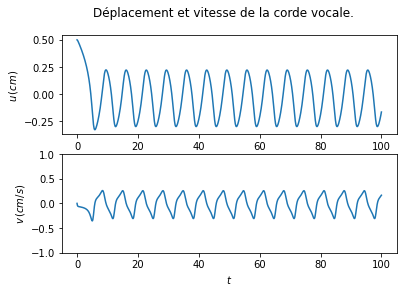

In [11]:
#Script
start = 0
end = 100
step = 0.1

initial_values = [0.5, 0] #déplacement et vitesse initiale

fig, (ax1, ax2) = plt.subplots(2, 1)

t, v = RK4(start, end, step, initial_values, derivee, 2)
ax1.plot(t, v[0])
ax2.plot(t, v[1])
    
plt.xlabel(r"$t$")
ax1.set_ylabel(r"$u \, (cm)$")
ax2.set_ylabel(r"$v \, (cm/s)$")
fig.suptitle("Déplacement et vitesse de la corde vocale.")
plt.ylim(-1, 1)
#plt.legend(bbox_to_anchor=(1, 1))

plt.show()

### Pression glottale

Observons la pressions au niveau de la glotte :

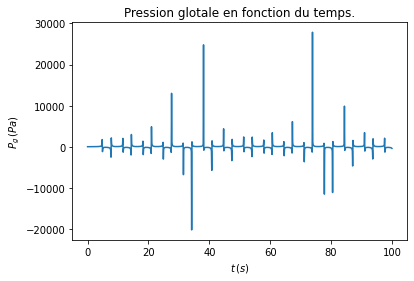

In [12]:
Pg = (2 * Pl * tau)/(x0 + v[0] + tau * v[1])
plt.plot(t, Pg, '-')
plt.title("Pression glotale en fonction du temps.")
plt.xlabel(r"$t \, (s)$")
plt.ylabel(r"$P_g \, (Pa)$")
plt.show()

Dire quelque chose

### Synthèse sonore

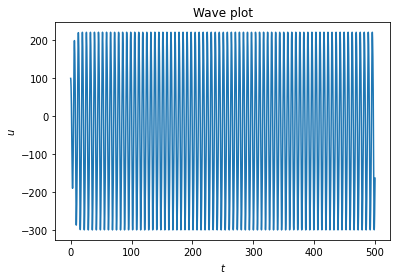

In [13]:
from scipy.io.wavfile import write

samplingRate = 44100 
amplitude = 1000

step = 0.1
start = 0
end = 500


initial_values = [0.1, 0]

t, v = RK4(start, end, step, initial_values, derivee, 2)

signal = amplitude * v[0] #amplification arbitraire
wavFile = write("wav/test.wav", samplingRate, signal.astype("float32"))

plt.plot(t, signal) 

plt.xlabel(r"$t$")
plt.ylabel(r"$u$")
plt.title("Wave plot")
plt.show()

In [14]:
print("Attention les oreilles...")
ipd.Audio('wav/test.wav') #load local WAV file

Attention les oreilles...


On peut analyser les fréquences obtenues grâce aux transformés de fourier.

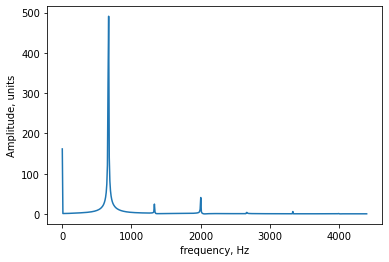

In [15]:
fft_spectrum = np.fft.rfft(v[0]) # Transformée de fourier appliqué à notre signal
freq = np.fft.rfftfreq(v[0].size, d=1./samplingRate) # Échelle des fréquences

fft_spectrum_abs = np.abs(fft_spectrum) # 

plt.plot(freq[:500], fft_spectrum_abs[:500]) # Affiche seulment les fréquence les plus importantes
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

Analysons à quelles fréquences correspondent les piques d'amplitudes

In [16]:
for i,f in enumerate(fft_spectrum_abs):
    if f > 100: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} Hz with amplitude {} '.format(np.round(freq[i],1),  np.round(f)))

frequency = 0.0 Hz with amplitude 162.0 
frequency = 652.5 Hz with amplitude 122.0 
frequency = 661.4 Hz with amplitude 325.0 
frequency = 670.2 Hz with amplitude 491.0 
frequency = 679.0 Hz with amplitude 140.0 


On a donc obtenu un signal dont la fréquence fondamental est $670.2 Hz$ avec cette méthode on peut même composer une petite chanson à partir de notre modèle.